In [2]:
import os
import git
import sys

git_repo = git.Repo(os.getcwd(), search_parent_directories=True)
git_root = git_repo.git.rev_parse("--show-toplevel")

sys.path.append(git_root)

from abm_vec.one_period_sim import run_sim, run_one_sim
from abm_vec.calibration import get_calibration_variables
from abm_vec.initialization import get_bank_data

from scipy.optimize import minimize
from scipy.stats import kstest
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from abm_vec.essentials.util import get_git_root_directory
import numpy as np
import random
from scipy import stats

In [12]:
def eq_change(res):
    prior_equity = res[0]['banks']['bank_equity']
    post_equity = res[1]['banks']['bank_equity']
    return  (post_equity - prior_equity)/prior_equity

In [3]:
bank_data = get_bank_data()
calibration_variables = get_calibration_variables()

### Check current parameters

In [5]:
results = run_one_sim(1, bank_data, calibration_variables)

In [7]:
empirical_le_ratio = results[0]['banks']['bank_loans'] / results[0]['banks']['bank_equity']
simulated_le_ratio = results[1]['banks']['bank_loans'] / results[0]['banks']['bank_equity']

(array([7., 1., 1., 1., 4., 6., 2., 0., 6., 2., 4., 1., 3., 4., 3., 5., 2.,
        1., 4., 2., 1., 2., 1., 0., 4., 0., 0., 0., 2., 1., 2., 1., 1., 0.,
        1., 2., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([0.        , 0.0810311 , 0.1620622 , 0.2430933 , 0.32412439,
        0.40515549, 0.48618659, 0.56721769, 0.64824879, 0.72927989,
        0.81031098, 0.89134208, 0.97237318, 1.05340428, 1.13443538,
        1.21546648, 1.29649757, 1.37752867, 1.45855977, 1.53959087,
        1.62062197, 1.70165307, 1.78268416, 1.86371526, 1.94474636,
        2.02577746, 2.10680856, 2.18783966, 2.26887076, 2.34990185,
        2.43093295, 2.51196405, 2.59299515, 2.67402625, 2.75505735,
        2.83608844, 2.91711954, 2.99815064, 3.07918174, 3.16021284,
        3.24124394, 3.32227503, 3.40330613, 3.48433723, 3.56536833,
        3.64639943, 3.72743053, 3.80846163, 3.88949272, 3.97052382,
        4.05155492]),
 <BarContainer object of 50 artists>)

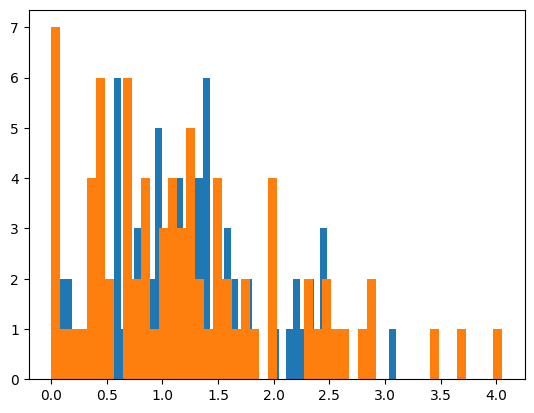

In [9]:
plt.hist(empirical_le_ratio,bins=50)
plt.hist(simulated_le_ratio,bins=50)

In [10]:
results_1 = run_one_sim(1, bank_data, calibration_variables)
results_25 = run_one_sim(25, bank_data, calibration_variables)

In [13]:
eq_1 = eq_change(results_1)
eq_25 = eq_change(results_25)

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0., 15., 11., 10., 12., 16.,  2.,  4.,  2.,  2.,  3.]),
 array([-0.09031165, -0.08449972, -0.0786878 , -0.07287588, -0.06706396,
        -0.06125204, -0.05544012, -0.04962819, -0.04381627, -0.03800435,
        -0.03219243, -0.02638051, -0.02056859, -0.01475666, -0.00894474,
        -0.00313282,  0.0026791 ,  0.00849102,  0.01430295,  0.02011487,
         0.02592679,  0.03173871,  0.03755063,  0.04336255,  0.04917448,
         0.0549864 ]),
 <BarContainer object of 25 artists>)

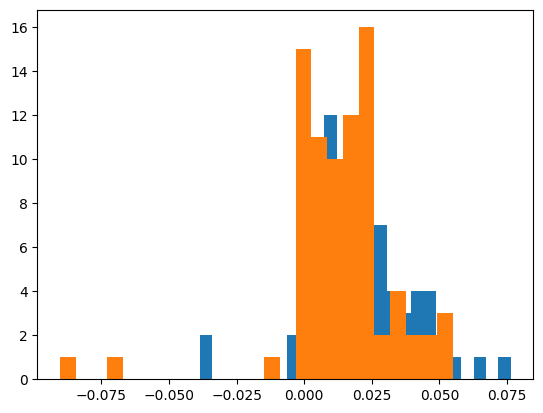

In [17]:
plt.hist(eq_1, bins=25)
plt.hist(eq_25, bins=25)

In [21]:
np.median(list(eq_25))

0.01551589102164181

In [22]:
np.median(list(eq_1))

0.017778585329132346